In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 1.0 Data Preparation

- There is no missing values for both 2 datasets
- 1 duplicated records identified, but it makes sense in real-life so it has been left in the dataset
- Data format of column of DATE has been modified
- Brand name has been generated for a new column, products of salsa instead of chips has been identified so that deleted
- Package size has been categorised into 5 types from mini to jumbo sizes for further analysis
- There are 2 extreme values for total sales (and quantities correspondlingly) made by the identical customer, which has been deleted for general analysis.

In [2]:
df_tran = pd.read_excel('QVI_transaction_data.xlsx')
df_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [3]:
df_cu=pd.read_csv('QVI_purchase_behaviour.csv')
df_cu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


#### Check missing values

In [30]:
print(df_tran.isnull().sum(),df_cu.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64 LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [4]:
df=pd.merge(df_tran,df_cu,on='LYLTY_CARD_NBR',how='left')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [7]:
df.to_csv('combined.csv')

#### Check duplicated values

In [81]:
df[df.duplicated(keep=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
124843,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium


#### Check data format

In [82]:
from datetime import date, timedelta

df['DATE']=[date(1900,1,1)+timedelta(interval-2) for interval in df.DATE]
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


#### Generate brand names

In [83]:
df.PROD_NAME.str.split().str[0].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3185
Doritos       24962
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Old            9324
Pringles      25102
RRD           11894
Red            5885
Smith          2963
Smiths        28860
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     4437
Name: PROD_NAME, dtype: int64

In [84]:
# delete other products: when researching chips brands, it shows that there are another product salsa is recorded
df=df[~df.PROD_NAME.str.contains(r'[Ss]alsa')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              246742 non-null  object 
 1   STORE_NBR         246742 non-null  int64  
 2   LYLTY_CARD_NBR    246742 non-null  int64  
 3   TXN_ID            246742 non-null  int64  
 4   PROD_NBR          246742 non-null  int64  
 5   PROD_NAME         246742 non-null  object 
 6   PROD_QTY          246742 non-null  int64  
 7   TOT_SALES         246742 non-null  float64
 8   LIFESTAGE         246742 non-null  object 
 9   PREMIUM_CUSTOMER  246742 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 20.7+ MB


In [85]:
# Ensure brands's names are consistent:
brand_name=[]
for name in df.PROD_NAME:
    if name.split()[0]=='Dorito':
        brand_name.append('Doritos')
    elif name.split()[0]=='Grain':
        brand_name.append('Sunbites')
    elif name.split()[0]=='GrnWves':
        brand_name.append('Sunbites')
    elif name.split()[0]=='Snbts':
        brand_name.append('Sunbites')
    elif name.split()[0]=='Infzns':
        brand_name.append('Infuzions')
    elif name.split()[0]=='NCC':
        brand_name.append('Natural Chip Co')
    elif name.split()[0]=='Natural':
        brand_name.append('Natural Chip Co')
    elif name.split()[0]=='RRD':
        brand_name.append('Red Rock Deli')
    elif name.split()[0]=='Red':
        brand_name.append('Red Rock Deli')
    elif name.split()[0]=='Smith':
        brand_name.append('Smiths')
    elif name.split()[0]=='WW':
        brand_name.append('Woolworths')
    else:
        brand_name.append(name.split()[0])
df['BRAND_NAME']=brand_name
df.BRAND_NAME.unique()

array(['Natural Chip Co', 'CCs', 'Smiths', 'Kettle', 'Sunbites',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos'], dtype=object)

#### Generate package size and its categories

In [86]:
df.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai  C

In [87]:
df['SIZE']=df.PROD_NAME.str.extract(r'([0-9]+[Gg])')[0].str.replace('G','g').str.replace('g','').astype('float')
df['SIZE_TYPE']=pd.cut(df.SIZE,bins=[0,100,200,300,350,500],labels=['mini','small','medium','large','jumbo'])
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NAME,SIZE,SIZE_TYPE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Co,175.0,small
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,175.0,small
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170.0,small
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,175.0,small
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,150.0,small


#### Check distribution of total sales

{'whiskers': [<matplotlib.lines.Line2D at 0x1b471884580>,
 'caps': [<matplotlib.lines.Line2D at 0x1b471884820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b4718bf5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b45f41be50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b45f41b340>],
 'means': []}

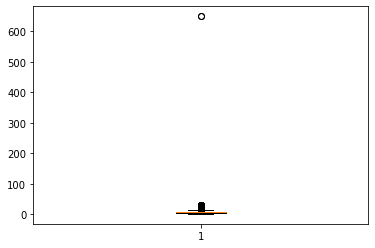

In [88]:
plt.boxplot(df.TOT_SALES)

In [89]:
IQR = df[['TOT_SALES']].quantile(0.75)-df[['TOT_SALES']].quantile(0.25)
upp_limit=df[['TOT_SALES']].quantile(0.75)+1.5*IQR
low_limit=df[['TOT_SALES']].quantile(0.25)-1.5*IQR
print(upp_limit,low_limit)

TOT_SALES    13.3
dtype: float64 TOT_SALES    1.3
dtype: float64


1.7


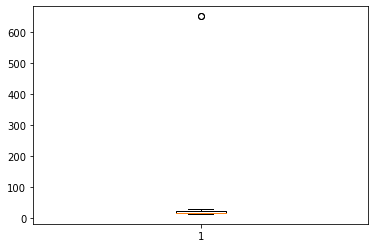

In [90]:
#check how large outliers distribute
df_extre = df.loc[df.TOT_SALES>13.3]
plt.boxplot(df_extre.TOT_SALES)

#check any small outliers:
print(df.TOT_SALES.min())

In [91]:
# The above boxplot shows one eztreme value, so get the details:
df.loc[df.TOT_SALES==df.TOT_SALES.max()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NAME,SIZE,SIZE_TYPE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Doritos,380.0,jumbo
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Doritos,380.0,jumbo


In [92]:
# This is an unusual purchase, and check whether he/she has other transactions
df.loc[df.LYLTY_CARD_NBR==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NAME,SIZE,SIZE_TYPE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Doritos,380.0,jumbo
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Doritos,380.0,jumbo


In [93]:
# For general analysis, delete this extreme values:
df.drop([69762,69763],axis=0,inplace=True)

(array([3.77800e+04, 7.09690e+04, 1.02883e+05, 3.15000e+04, 3.14000e+03,
        1.42000e+02, 1.38000e+02, 1.34000e+02, 0.00000e+00, 5.40000e+01]),
 array([ 1.7 ,  4.48,  7.26, 10.04, 12.82, 15.6 , 18.38, 21.16, 23.94,
        26.72, 29.5 ]),
 <a list of 10 Patch objects>)

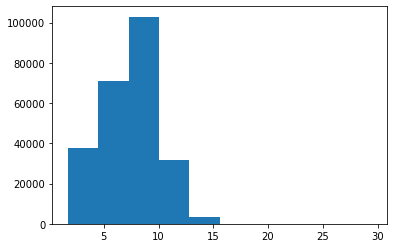

In [94]:
# check distributions
plt.hist(df.TOT_SALES)

# 2.0 Summary of Data

- The date is from 1/07/2018 to 30/06/2019, 364 days has been recorded, with 25/12/2018 missing, which makes sense.
- There are 71287 identical customers, with 246740 transaction records about chips.
- There are 272 stores in the records
- There are 19 brands, with 105 numbers of products in total
- 7 lifestages of people recorded, and with 3 kinds of customer types

#### Date check

In [96]:
print(df.DATE.max(),df.DATE.min(),df.DATE.max()-df.DATE.min())

2019-06-30 2018-07-01 364 days, 0:00:00


In [97]:
date_list=[df.DATE.min() + timedelta(interval) for interval in range(365) ]
print(set(date_list).difference(set(df.DATE)))

{datetime.date(2018, 12, 25)}


#### Check customer NO. and transaction No.

In [99]:
print(len(df.LYLTY_CARD_NBR.unique()),df.shape)

71287 (246740, 13)


#### Check stores No.

In [100]:
print(len(df.STORE_NBR.unique()))

271


#### Check product types

In [102]:
print(len(df.LIFESTAGE.unique()),len(df.BRAND_NAME.unique()),len(df.PROD_NBR.unique()))

7 19 105


#### Check customer type

In [104]:
print(df.LIFESTAGE.unique(),df.PREMIUM_CUSTOMER.unique())

['YOUNG SINGLES/COUPLES' 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES'
 'OLDER FAMILIES' 'OLDER SINGLES/COUPLES' 'RETIREES' 'YOUNG FAMILIES'] ['Premium' 'Budget' 'Mainstream']


# 3.0 Customer Segment EDA

- How customer segments contribute to total sales?
- Top saled brands for different customer segments?
- How different segments respond to package size?
- How customers respond to time?

#### How customer segments contribute to total sales?

In [106]:
# Get the data
group_sale=df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'TOT_SALES':'sum','LYLTY_CARD_NBR':'nunique'})

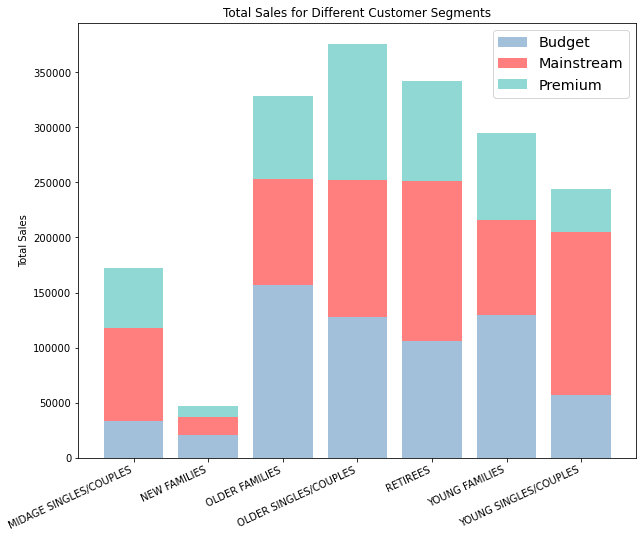

In [138]:
# Draw stacked bar for total sales

fig,ax1=plt.subplots(figsize=(10,8))
x=group_sale.index.levels[0]
y01=group_sale.TOT_SALES.values[::3]
y02=group_sale.TOT_SALES.values[1::3]
y03=group_sale.TOT_SALES.values[2::3]

ax1.bar(x,height=y01,color='steelblue',label='Budget',alpha=0.5)
ax1.bar(x,height=y02,bottom=y01,color='red',label='Mainstream',alpha=0.5)
ax1.bar(x,height=y03,bottom=(y01+y02),color='lightseagreen',label='Premium',alpha=0.5)
ax1.set_ylabel('Total Sales')
ax1.set_title('Total Sales for Different Customer Segments')
ax1.set_xticklabels(x,rotation=25,ha='right')
plt.legend(('Budget','Mainstream','Premium'),fontsize='x-large')
plt.show()

SALE = QUANTITY * AVERAGE PURCHASE
so we have to evaluate quantity & average purchase:

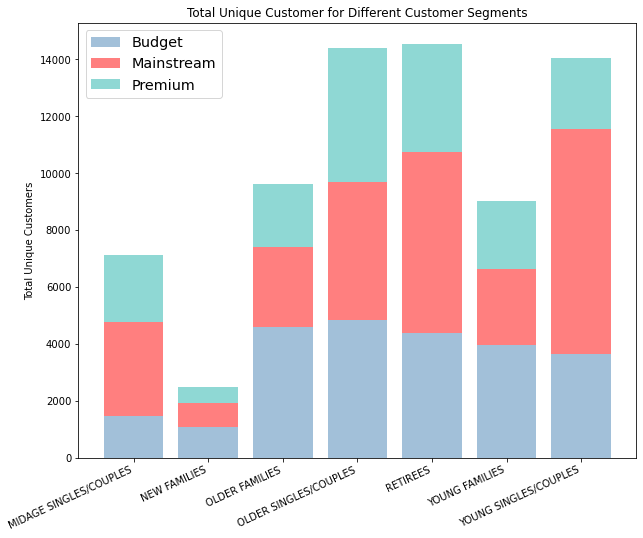

In [140]:
# Discover how many customers in each customer segment

fig,ax2=plt.subplots(figsize=(10,8))

x=group_sale.index.levels[0]
y11=group_sale.LYLTY_CARD_NBR.values[::3]
y12=group_sale.LYLTY_CARD_NBR.values[1::3]
y13=group_sale.LYLTY_CARD_NBR.values[2::3]

ax2.bar(x,height=y11,color='steelblue',label='Budget',alpha=0.5)
ax2.bar(x,height=y12,bottom=y11,color='red',label='Mainstream',alpha=0.5)
ax2.bar(x,height=y13,bottom=(y11+y12),color='lightseagreen',label='Premium',alpha=0.5)

ax2.set_ylabel('Total Unique Customers')
ax2.set_title('Total Unique Customer for Different Customer Segments')
ax2.set_xticklabels(x,rotation=25,ha='right')
plt.legend(('Budget','Mainstream','Premium'),fontsize='x-large')
plt.show()

In [146]:
average=group_sale.TOT_SALES.values/group_sale.LYLTY_CARD_NBR.values

budget_mean=average[::3]
main_mean=average[1::3]
premium_mean=average[2::3]

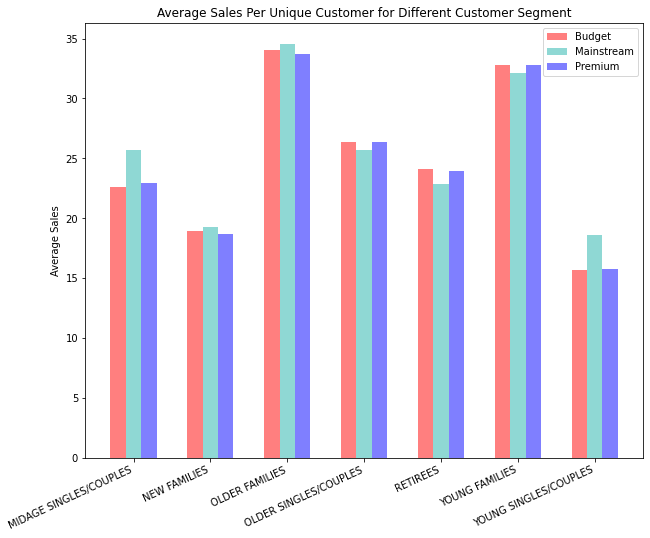

In [147]:
fig,ax = plt.subplots(figsize=(10,8))
x=np.arange(7)
width = 0.2

rect1=ax.bar(x-width,budget_mean,width,label='Budget',color='red',alpha=0.5)
rect2=ax.bar(x,main_mean,width,label='Mainstream',color='lightseagreen',alpha=0.5)
rect3=ax.bar(x+width,premium_mean,width,label='Premium',color='blue',alpha=0.5)

ax.set_ylabel('Average Sales')
ax.set_title('Average Sales Per Unique Customer for Different Customer Segment')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=25,ha='right')
ax.legend()
plt.show()

#### Top saled brands for different customer segments?

In [148]:
# define a function to get top 3 saled brands:
def top_3(stage):  
    print('Top 3 Brands are','\n',
          df[df.LIFESTAGE==stage].groupby(['BRAND_NAME']).agg({'TOT_SALES':'sum'}).sort_values('TOT_SALES').index[-1],'\n',
          df[df.LIFESTAGE==stage].groupby(['BRAND_NAME']).agg({'TOT_SALES':'sum'}).sort_values('TOT_SALES').index[-2],'\n',
          df[df.LIFESTAGE==stage].groupby(['BRAND_NAME']).agg({'TOT_SALES':'sum'}).sort_values('TOT_SALES').index[-3],'\n','*'*10)

In [149]:
for stage in df.LIFESTAGE.unique():
    print(stage)
    top_3(stage)

YOUNG SINGLES/COUPLES
Top 3 Brands are 
 Kettle 
 Doritos 
 Smiths 
 **********
MIDAGE SINGLES/COUPLES
Top 3 Brands are 
 Kettle 
 Doritos 
 Smiths 
 **********
NEW FAMILIES
Top 3 Brands are 
 Kettle 
 Doritos 
 Smiths 
 **********
OLDER FAMILIES
Top 3 Brands are 
 Kettle 
 Smiths 
 Doritos 
 **********
OLDER SINGLES/COUPLES
Top 3 Brands are 
 Kettle 
 Doritos 
 Smiths 
 **********
RETIREES
Top 3 Brands are 
 Kettle 
 Doritos 
 Smiths 
 **********
YOUNG FAMILIES
Top 3 Brands are 
 Kettle 
 Smiths 
 Doritos 
 **********


In [151]:
# it look like all segments has the same top 3 brands
# check different customer types:
def top_3_customer_type(stage):
    df_new=df[df.LIFESTAGE==stage]
    print('*'*10,'For Budget:','\n',df_new.groupby(['PREMIUM_CUSTOMER','BRAND_NAME']).agg({'TOT_SALES':'sum'})['TOT_SALES'].Budget.sort_values()[-3:],'\n',
         '*'*10,'For Mainstream:','\n',df_new.groupby(['PREMIUM_CUSTOMER','BRAND_NAME']).agg({'TOT_SALES':'sum'})['TOT_SALES'].Mainstream.sort_values()[-3:],'\n',
         '*'*10,'For Premium:','\n',df_new.groupby(['PREMIUM_CUSTOMER','BRAND_NAME']).agg({'TOT_SALES':'sum'})['TOT_SALES'].Premium.sort_values()[-3:],'\n','!'*20)

In [152]:
for stage in df.LIFESTAGE.unique():
    print(stage)
    print(top_3_customer_type(stage))

YOUNG SINGLES/COUPLES
********** For Budget: 
 BRAND_NAME
Doritos     6830.0
Smiths      7373.1
Kettle     11106.0
Name: TOT_SALES, dtype: float64 
 ********** For Mainstream: 
 BRAND_NAME
Pringles    16006.2
Doritos     20925.9
Kettle      35423.6
Name: TOT_SALES, dtype: float64 
 ********** For Premium: 
 BRAND_NAME
Doritos    4257.6
Smiths     5103.9
Kettle     7711.4
Name: TOT_SALES, dtype: float64 
 !!!!!!!!!!!!!!!!!!!!
None
MIDAGE SINGLES/COUPLES
********** For Budget: 
 BRAND_NAME
Smiths     4056.3
Doritos    4291.0
Kettle     6736.2
Name: TOT_SALES, dtype: float64 
 ********** For Mainstream: 
 BRAND_NAME
Smiths      9874.10
Doritos    10714.65
Kettle     20231.80
Name: TOT_SALES, dtype: float64 
 ********** For Premium: 
 BRAND_NAME
Smiths      6420.10
Doritos     6562.95
Kettle     11390.20
Name: TOT_SALES, dtype: float64 
 !!!!!!!!!!!!!!!!!!!!
None
NEW FAMILIES
********** For Budget: 
 BRAND_NAME
Smiths     2280.80
Doritos    2812.65
Kettle     4731.60
Name: TOT_SALES, dtype

#### How different segments respond to package size?

In [216]:
# Get data
group_packsize=df[['LIFESTAGE','SIZE_TYPE']].groupby(['LIFESTAGE','SIZE_TYPE']).agg({'SIZE_TYPE':'count'}).unstack().SIZE_TYPE
group_packsize.columns=group_packsize.columns.add_categories(['Total','mini_per','small_per','medium_per','large_per','jumbo_per'])
total=group_packsize.mini.values+group_packsize.small.values+group_packsize.medium.values+group_packsize.large.values+group_packsize.jumbo.values
group_packsize['Total']=total
group_packsize['mini_per']=group_packsize.mini.values/total
group_packsize['small_per']=group_packsize.small.values/total
group_packsize['medium_per']=group_packsize.medium.values/total
group_packsize['large_per']=group_packsize.large.values/total
group_packsize['jumbo_per']=group_packsize.jumbo.values/total
group_packsize

SIZE_TYPE,mini,small,medium,large,jumbo,Total,mini_per,small_per,medium_per,large_per,jumbo_per
LIFESTAGE,,,,,,,,,,,
MIDAGE SINGLES/COUPLES,390,19464,1696,1220,628,23398,0.016668,0.831866,0.072485,0.052141,0.026840
NEW FAMILIES,89,5448,456,319,185,6497,0.013699,0.838541,0.070186,0.049100,0.028475
OLDER FAMILIES,933,37861,3087,2205,1072,45158,0.020661,0.838412,0.068360,0.048829,0.023739
OLDER SINGLES/COUPLES,892,42394,3552,2599,1356,50793,0.017561,0.834643,0.069931,0.051168,0.026697
RETIREES,798,38593,3360,2439,1241,46431,0.017187,0.831190,0.072365,0.052530,0.026728
YOUNG FAMILIES,870,34037,2653,1955,979,40494,0.021485,0.840544,0.065516,0.048279,0.024176
YOUNG SINGLES/COUPLES,543,28182,2486,1803,955,33969,0.015985,0.829639,0.073184,0.053078,0.028114


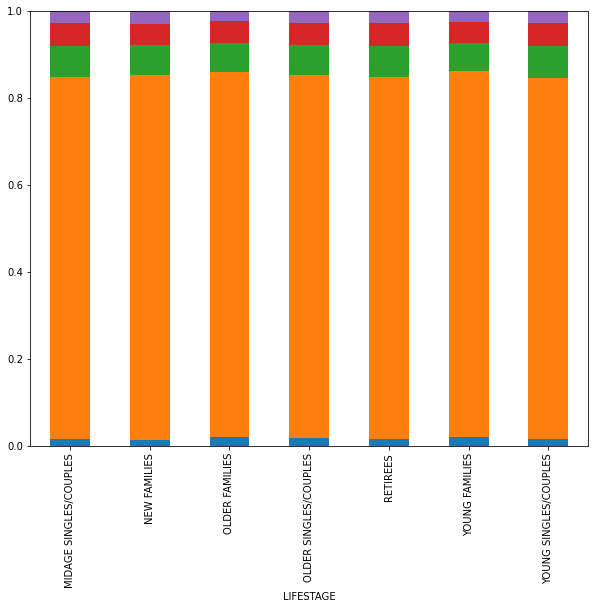

In [219]:
# Draw stacked bar of percentage
group_packsize[['mini_per','small_per','medium_per','large_per','jumbo_per']].plot(kind='bar',stacked=True,figsize=(10,8),legend=False,ylim=(0,1))

#### How they respond to time

In [221]:
# To check for each month
df['MONTH']=[i.month for i in df.DATE]

#Get data
group_time = df[['LIFESTAGE','MONTH','TOT_SALES']].groupby(['LIFESTAGE','MONTH']).sum().unstack()
group_time

TOT_SALES                                       \
MONTH                         1        2        3        4         5    
LIFESTAGE                                                               
MIDAGE SINGLES/COUPLES   14744.5  13133.6  14370.1  15023.0  14169.65   
NEW FAMILIES              4158.6   3901.1   4138.8   3915.3   3855.80   
OLDER FAMILIES           28201.1  25950.7  28481.3  26929.7  26118.55   
OLDER SINGLES/COUPLES    30341.0  29163.0  32341.3  30570.8  30576.25   
RETIREES                 28232.8  27092.9  29747.0  28398.8  28070.25   
YOUNG FAMILIES           25462.1  23198.0  24768.3  24877.9  24389.50   
YOUNG SINGLES/COUPLES    20453.7  18040.7  21926.0  19658.7  19120.35   

                                                                               \
MONTH                        6        7         8        9        10       11   
LIFESTAGE                                                                       
MIDAGE SINGLES/COUPLES  14543.3  14860.9  13899.35  14952.6  14421.6  13975.6   
NEW FAMILIES             4138.8   3859.6   3799.25   4054.4   3960.4   3869.2   
OLDER FAMILIES          27037.1  28353.0  26538.35  26231.4  28322.2  28295.8   
OLDER SINGLES/COUPLES   31118.7  32683.7  31246.20  31676.7  32618.3  31172.4   
RETIREES                27747.7  28811.2  28307.45  28184.8  28722.1  28374.1   
YOUNG FAMILIES          24508.9  25379.9  24146.70  24482.3  24439.9  23808.6   
YOUNG SINGLES/COUPLES   21041.4  20566.2  19484.75  20476.7  20969.6  20113.8   

                                 
MONTH                        12  
LIFESTAGE                        
MIDAGE SINGLES/COUPLES  14429.6  
NEW FAMILIES             3696.7  
OLDER FAMILIES          28060.7  
OLDER SINGLES/COUPLES   32511.3  
RETIREES                30692.8  
YOUNG FAMILIES          25165.8  
YOUNG SINGLES/COUPLES   21904.7

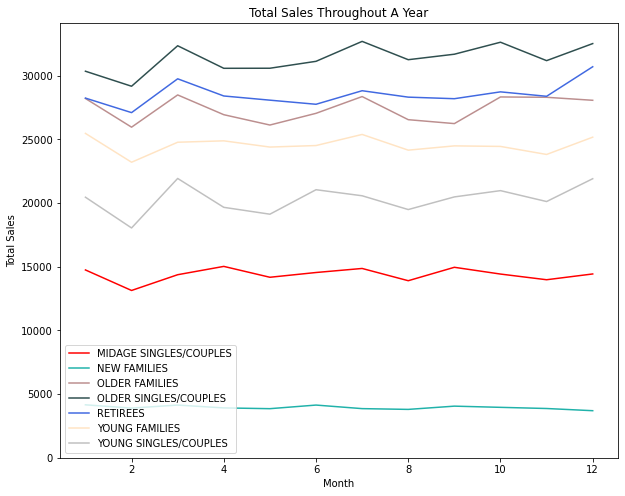

In [231]:
# Draw line chart for each segment

fig,ax=plt.subplots(figsize=(10,8))

x=group_time.TOT_SALES.columns
y0=group_time.loc[group_time.index[0]]
y1=group_time.loc[group_time.index[1]]
y2=group_time.loc[group_time.index[2]]
y3=group_time.loc[group_time.index[3]]
y4=group_time.loc[group_time.index[4]]
y5=group_time.loc[group_time.index[5]]
y6=group_time.loc[group_time.index[6]]
y_ticks=np.arange(0,35000,5000)

ax.plot(x,y0,color='red')
ax.plot(x,y1,color='lightseagreen')
ax.plot(x,y2,color='rosybrown')
ax.plot(x,y3,color='darkslategrey')
ax.plot(x,y4,color='royalblue')
ax.plot(x,y5,color='bisque')
ax.plot(x,y6,color='silver')

plt.title('Total Sales Throughout A Year')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.legend(group_time.index)
plt.yticks(y_ticks)
plt.show()

# 4.0 Insights

#### How customer segments contribute to total sales?
- OLDER SINGLES/COUPLES and RETIREES contribute most to annual total sales, and this is mainly because more people in this segment bought chips
- OLDER FAMILIES and YOUNG FAMILIES also contribute a large portion to total sales, but mainly because they averagely spent more on chips even for budget customers
- Quite a portion of YOUNG SINGLES/COUPLES purchased Chips, however, they tend to spend least averagely. 
- For NEW FAMILLIES,it implied that they do not like to purchase Chips as least of NEW FAMILLIES being identified, with MIDAGE SINGLES being the second least.

#### Top saled brands for different customer segments?
- KETTLE,SMITHS,FORITOS are the top 3 brands for all customer segments.
- When dig deeper to discover customer type, PRINGLES replaced SMITHS and become the top 3 saled brands for Mainstream YOUND SINGLES

#### Package size:
- The package size has been divided into the following 5 categories:
 mini: 0-100g
 small: 100-200g
 medium: 200-300g
 large: 300-350g
 Jumbo: over 350g
 All customer segments behave similarly in terms of package size, with small (100-200g) size outstandingly accepted.
 
#### How customers respond to time?
- for most segments, March, July, October, December see peak in sales
- OLDER SINGLES/COUPLES, OLDER FAMILIES, and YOUNG SINGLES/COUPLES tend to be more seasonally sensitive.